<h1 style="color: #4A90E2;">Diamond Price Analysis: Predicting Price with Random Forest Models</h1>


<p style="color: #333333; font-size: 16px;">
    This Jupyter notebook delves into the intricacies of diamond pricing, utilizing a <strong style="color: #E94E77;">Random Forest</strong> model to predict prices based on various attributes such as carat weight, cut, color, and clarity etc. By harnessing the power of machine learning, we aim to uncover hidden patterns and provide insights that can guide decision-making in the diamond market.
</p>

In [4]:
#Import pandas and read data

import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('M6_T2_V1_Diamonds.csv')
df.describe(include='all')

,carat,cut,color,clarity,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,5324.250000,6.540000,6.540000,4.040000


In [5]:
# Check for null values in data

print(df.isnull().values.any())

False


In [6]:
print(df.dtypes)

carat      float64
cut         object
color       object
clarity     object
price        int64
x          float64
y          float64
z          float64
dtype: object


# Handling categorical variables
Since cut, color and clarity are categorical variables and cannot be used directly in our model, we would convert them to indicator variables.

In [7]:
df[['cut']].value_counts()

cut      
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [8]:
df[['color']].value_counts()

color
G        11292
E         9797
F         9542
H         8304
D         6775
I         5422
J         2808
Name: count, dtype: int64

In [9]:
df[['clarity']].value_counts()

clarity
SI1        13065
VS2        12258
SI2         9194
VS1         8171
VVS2        5066
VVS1        3655
IF          1790
I1           741
Name: count, dtype: int64

In [10]:
cut_dummy_variable = pd.get_dummies(df['cut'])
cut_dummy_variable.head()

,Fair,Good,Ideal,Premium,Very Good
0,False,False,True,False,False
1,False,False,False,True,False
2,False,True,False,False,False
3,False,False,False,True,False
4,False,True,False,False,False


In [11]:
color_dummy_variable = pd.get_dummies(df['color'])
color_dummy_variable.head()

,D,E,F,G,H,I,J
0,False,True,False,False,False,False,False
1,False,True,False,False,False,False,False
2,False,True,False,False,False,False,False
3,False,False,False,False,False,True,False
4,False,False,False,False,False,False,True


In [12]:
clarity_dummy_variable = pd.get_dummies(df['clarity'])
clarity_dummy_variable.head()

,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,False,False,False,True,False,False,False,False
1,False,False,True,False,False,False,False,False
2,False,False,False,False,True,False,False,False
3,False,False,False,False,False,True,False,False
4,False,False,False,True,False,False,False,False


In [13]:
# concatenating cut, color and clarity dummy variables with the dataframe

df = pd.concat([df, cut_dummy_variable, color_dummy_variable, clarity_dummy_variable], axis=1)

In [14]:
df.head()

,carat,cut,color,clarity,price,x,y,z,Fair,Good,...,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.23,Ideal,E,SI2,326,3.95,3.98,2.43,False,False,...,False,False,False,False,False,True,False,False,False,False
1,0.21,Premium,E,SI1,326,3.89,3.84,2.31,False,False,...,False,False,False,False,True,False,False,False,False,False
2,0.23,Good,E,VS1,327,4.05,4.07,2.31,False,True,...,False,False,False,False,False,False,True,False,False,False
3,0.29,Premium,I,VS2,334,4.20,4.23,2.63,False,False,...,True,False,False,False,False,False,False,True,False,False
4,0.31,Good,J,SI2,335,4.34,4.35,2.75,False,True,...,False,True,False,False,False,True,False,False,False,False


In [15]:
categorical_features = ['Good', 'Ideal', 'Premium', 'Very Good', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
                        'I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2']

<h1 style="font-size: 40px">Exploratory Data Analysis</h1>

# Box Plots
Here we examine distribution of diamond prices across different categories.

## Box plot distribution of cut categories

Text(0, 0.5, 'Price')

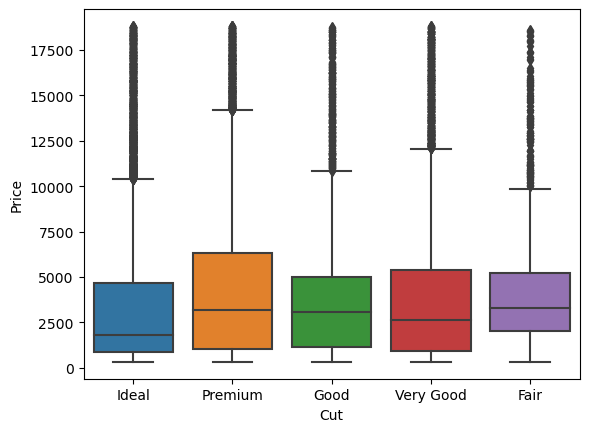

In [16]:
# box plot for distribution of prices based on each cut category

sns.boxplot(x=df['cut'], y=df['price'])
plt.xlabel('Cut')
plt.ylabel('Price')

## Box plot distribution of color categories

Text(0, 0.5, 'Price')

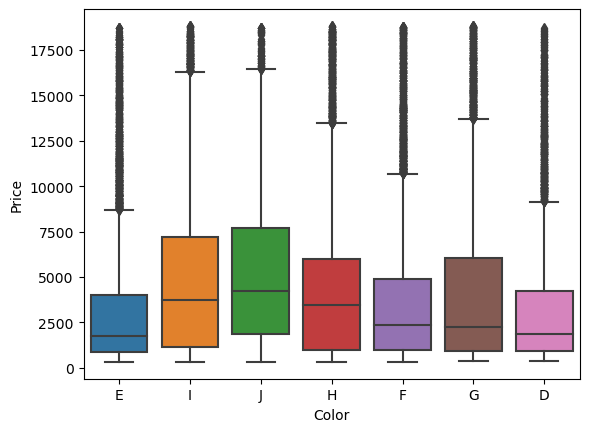

In [17]:
# box plot for distribution of prices based on each color category

sns.boxplot(x=df['color'], y=df['price'])
plt.xlabel('Color')
plt.ylabel('Price')

## Box plot distribution of clarity categories

Text(0, 0.5, 'Price')

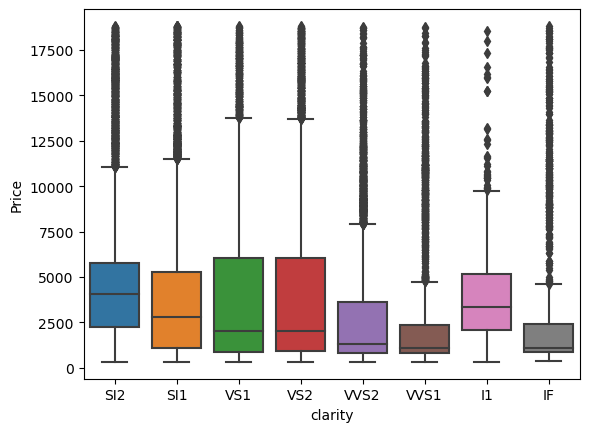

In [18]:
# box plot for distribution of prices based on each clarity category

sns.boxplot(x=df['clarity'], y=df['price'])
plt.xlabel('clarity')
plt.ylabel('Price')

# Exploring relationships between different numerical variables and price
<p>Here we will examine relationship between different numerical feature variables and the target price, we will first see the regression plots and then examine the correlation between them.</p>

## carat vs price

<Axes: xlabel='carat', ylabel='price'>

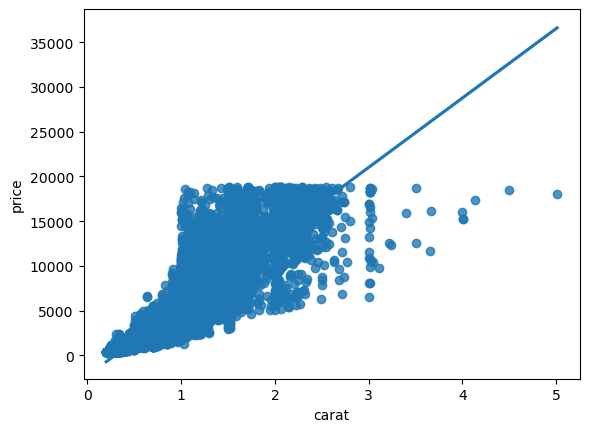

In [19]:
sns.regplot(x=df['carat'], y=df['price'])

## x vs price

<Axes: xlabel='x', ylabel='price'>

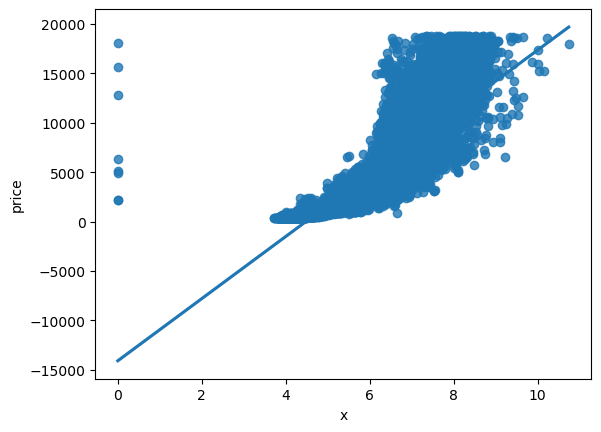

In [20]:
sns.regplot(x=df['x'], y=df['price'])

## y vs price

<Axes: xlabel='y', ylabel='price'>

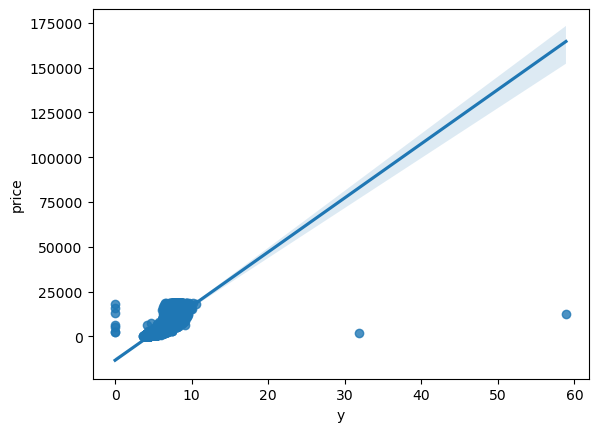

In [21]:
sns.regplot(x=df['y'], y=df['price'])

## z vs price

<Axes: xlabel='y', ylabel='price'>

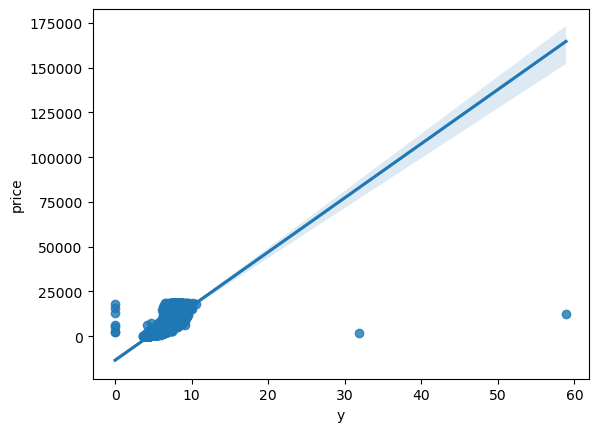

In [22]:
sns.regplot(x=df['y'], y=df['price'])

## Correlation

In [23]:
df[['carat', 'x', 'y', 'z', 'price']].corr()

,carat,x,y,z,price
carat,1.000000,0.975094,0.951722,0.953387,0.921591
x,0.975094,1.000000,0.974701,0.970772,0.884435
y,0.951722,0.974701,1.000000,0.952006,0.865421
z,0.953387,0.970772,0.952006,1.000000,0.861249
price,0.921591,0.884435,0.865421,0.861249,1.000000


## Conclusion
After examining the regression plots and correlation matrix above, we can safely conclude that there exists a highly positive correlation between each of the variables 'carat', 'x', 'y', 'z' and the variable 'price'. Thus all of these variables can be used as feature variables to predict the target 'price'.

# Selecting the target

In [24]:
y = df['price']

print(y.head())

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64


# Selecting features

In [25]:
features = ['carat', 'x', 'y', 'z'] + categorical_features
X = df[features]

In [26]:
X.describe(include='all')

,carat,x,y,z,Good,Ideal,Premium,Very Good,D,E,...,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
count,53940.000000,53940.000000,53940.000000,53940.000000,53940,53940,53940,53940,53940,53940,...,53940,53940,53940,53940,53940,53940,53940,53940,53940,53940
unique,NaN,NaN,NaN,NaN,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,NaN,NaN,NaN,NaN,49034,32389,40149,41858,47165,44143,...,48518,51132,53199,52150,40875,44746,45769,41682,50285,48874
mean,0.797940,5.731157,5.734526,3.538734,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.474011,1.121761,1.142135,0.705699,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.200000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.400000,4.710000,4.720000,2.910000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.700000,5.700000,5.710000,3.530000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.040000,6.540000,6.540000,4.040000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
X.head()

,carat,x,y,z,Good,Ideal,Premium,Very Good,D,E,...,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.23,3.95,3.98,2.43,False,True,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,0.21,3.89,3.84,2.31,False,False,True,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2,0.23,4.05,4.07,2.31,True,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
3,0.29,4.20,4.23,2.63,False,False,True,False,False,False,...,True,False,False,False,False,False,False,True,False,False
4,0.31,4.34,4.35,2.75,True,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False


# Building the model

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# train-test split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

# Defining model
diamond_price_model = RandomForestRegressor(random_state=1)

# Fit model
diamond_price_model.fit(train_X, train_y)


RandomForestRegressor(random_state=1)

In [29]:
# predictions

val_diamond_predictions = diamond_price_model.predict(val_X)

print('Predicted prices: \n', val_diamond_predictions)

Predicted prices: 
 [4823.34       7098.78       5291.69       ... 3061.81733333 2914.61
 1237.85      ]


# Validating the model using MAE and RMSE

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

diamond_price_mae = mean_absolute_error(val_y, val_diamond_predictions)
diamond_price_mse = mean_squared_error(val_y, val_diamond_predictions)

print('Mean absolute error is: ', diamond_price_mae)
print('Root mean squared error is: ', sqrt(diamond_price_mse))

Mean absolute error is:  275.42608645437906
Root mean squared error is:  571.3003414756756


In [31]:
# Comparing first five test prices and predicted prices

j = 0;
for i, v in val_y.items():
    if j == 5:
        break
    
    print(v, val_diamond_predictions[j])
    j += 1

4733 4823.34
6424 7098.78
5510 5291.69
8770 11418.55
4493 4590.57
